In [3]:
impscores_filename = "coordinates_0.K562_m1_r1.model.explanation.txt"
fasta_filename = "coordinates_0/coordinates_0.fa"

In [21]:
#loading importance scores
import numpy as np

def one_hot_encode_along_channel_axis(sequence):
    to_return = np.zeros((len(sequence),4), dtype=np.int8)
    seq_to_one_hot_fill_in_array(zeros_array=to_return,
                                 sequence=sequence, one_hot_axis=1)
    return to_return

def seq_to_one_hot_fill_in_array(zeros_array, sequence, one_hot_axis):
    assert one_hot_axis==0 or one_hot_axis==1
    if (one_hot_axis==0):
        assert zeros_array.shape[1] == len(sequence)
    elif (one_hot_axis==1): 
        assert zeros_array.shape[0] == len(sequence)
    #will mutate zeros_array
    for (i,char) in enumerate(sequence):
        if (char=="A" or char=="a"):
            char_idx = 0
        elif (char=="C" or char=="c"):
            char_idx = 1
        elif (char=="G" or char=="g"):
            char_idx = 2
        elif (char=="T" or char=="t"):
            char_idx = 3
        elif (char=="N" or char=="n"):
            continue #leave that pos as all 0's
        else:
            raise RuntimeError("Unsupported character: "+str(char))
        if (one_hot_axis==0):
            zeros_array[char_idx,i] = 1
        elif (one_hot_axis==1):
            zeros_array[i,char_idx] = 1
            
#read in the fasta files and one-hot encode
fasta_coords = [x.rstrip() for (i,x) in enumerate(open(fasta_filename)) if i%2==0]
fasta_seqs = [x.rstrip() for (i,x) in enumerate(open(fasta_filename))
              if i%2==1]
#filter out any sequences that contain 'N's
onehot_data = [np.array(one_hot_encode_along_channel_axis(x))
                         for x in fasta_seqs if ('N' not in x)]
print("Num onehot sequences:",len(onehot_data))

impscores = [w[0] for w in zip([
    np.array( [[float(z) for z in y.split(",")]
                for y in x.rstrip().split("\t")[2].split(";")])
    for x in open(impscores_filename)
],fasta_seqs) if 'N' not in w[1]]

Num onehot sequences: 8001


In [10]:
!pip install vizsequence

  Stored in directory: /users/avanti.shrikumar/.cache/pip/wheels/08/eb/de/6b398b439ba39c278e5c341bdeed57d66280910e096496eaef
Successfully built vizsequence


In [15]:
impscores = np.array(impscores)
sorted_indices = sorted(enumerate(np.sum(impscores,axis=(1,2))), key=lambda x: -x[1])

>chr2:61515250-61515500 6939 2.1547515819


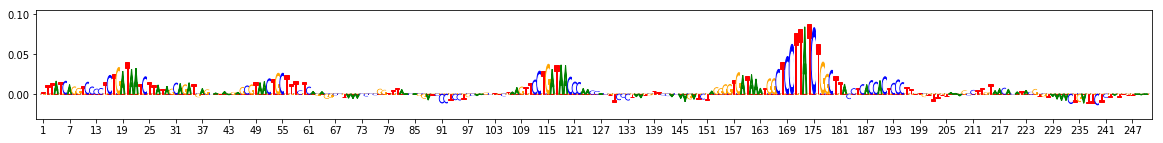

>chr2:60412250-60412500 2527 2.1480682673


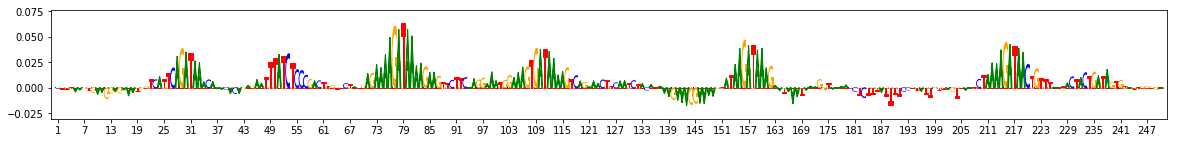

>chr2:59917000-59917250 546 2.0094170683


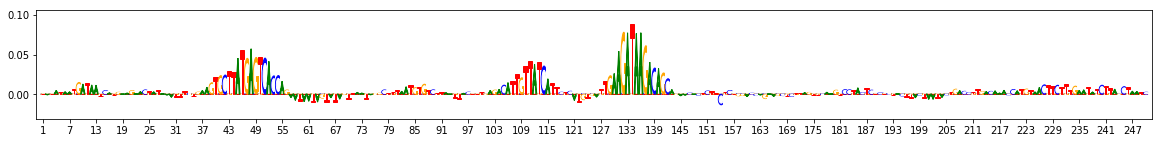

>chr2:61697750-61698000 7669 1.672061319


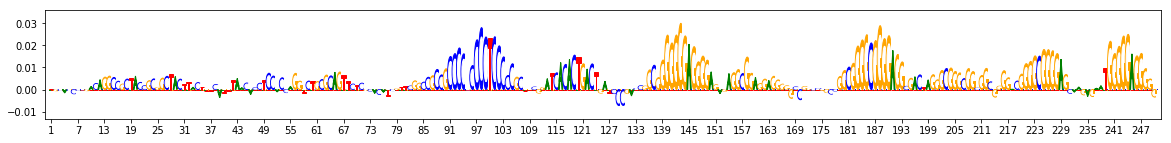

>chr2:61675500-61675750 7580 1.6231376544999998


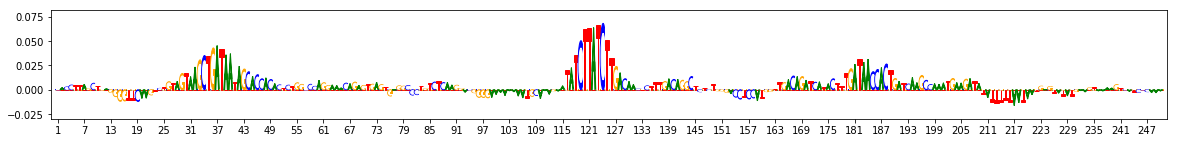

>chr2:61067750-61068000 5149 1.61966054391


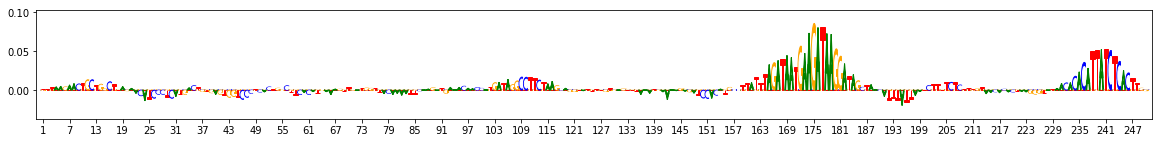

>chr2:60650000-60650250 3478 1.6095492939999998


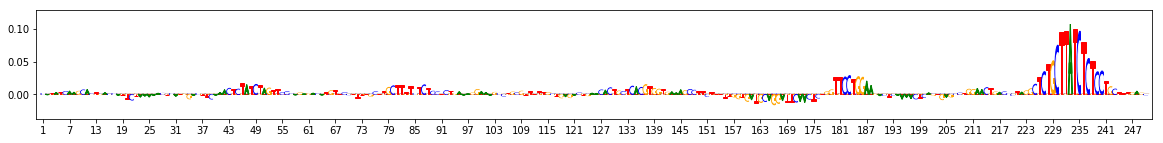

>chr2:61757000-61757250 7906 1.5898683201000001


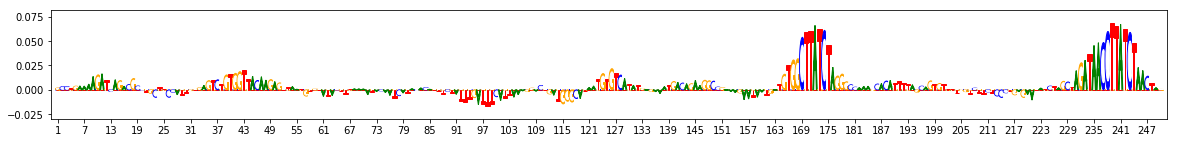

>chr2:60454250-60454500 2695 1.5488919422


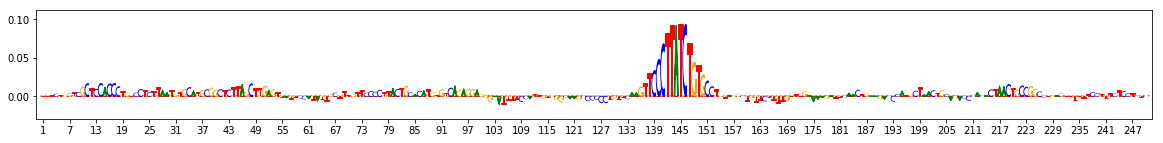

>chr2:59914000-59914250 534 1.5397152880199998


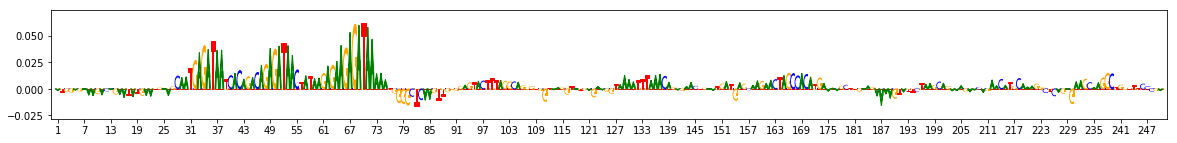

In [23]:
%matplotlib inline
from vizsequence import viz_sequence

for (idx,diffref) in sorted_indices[:10]:
    print(fasta_coords[idx],idx,diffref)
    viz_sequence.plot_weights(impscores[idx])